<a href="https://colab.research.google.com/github/willandru/LINEAR-REGRESSION/blob/main/SemillasTrigo_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

William Andrés Gómez Roa

Pontifícia Universidad Javeriana

Regresión Lineal

Profesor Mario Saavedra


# **REGRESIÓN LINEAL EN R**

# **DATOS: FORMAS Y TAMAÑOS DE 3 VARIEDADES DE TRIGO MEDIDAS CON RAYOS-X**

Los DATOS aquí examinados son clases de granos de Trígo pertenecientes a tres variedades diferentes: Kama, Rosa y Canadian, con 70 elementos cada una, seleccionadas al azar para el experimento. Se utilizaron "rayos X suaves" para tener visualización de alta calidad de la estructura interna del núcleo.Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando granos de trigo cosechados con cosechadora provenientes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.

Estos datos fueron donados el 29 de septiembre de 2012 al repositorio de Machine Learning "UCI"

# Instalamos Librerias

In [32]:
install.packages('GGally')
install.packages('dplyr')
install.packages('statsr')
install.packages('ggfortify')
install.packages('tidyverse')
install.packages('olsrr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Cargamos los datos

In [33]:
df<-read.csv("seeds_dataset.csv", header = FALSE, sep = ";", dec = ".")
colnames(df) <- c("Area", "Perimeter", "Compactness", "Length_Kernel","Width_Kernel","Asymmetry_Coeff","Length_Groove","Variety_Wheat")
df <- subset(df, select = c(Area,Perimeter,Compactness,Length_Kernel,Width_Kernel,Asymmetry_Coeff,Length_Groove,Variety_Wheat))
df

,Area,Perimeter,Compactness,Length_Kernel,Width_Kernel,Asymmetry_Coeff,Length_Groove,Variety_Wheat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
2,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
3,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
5,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
6,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
7,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
8,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
9,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1


# Análisis Exploratorio de los Datos

In [34]:
head(df)

,Area,Perimeter,Compactness,Length_Kernel,Width_Kernel,Asymmetry_Coeff,Length_Groove,Variety_Wheat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
6,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [35]:
summary(df)

      Area         Perimeter      Compactness     Length_Kernel  
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262  
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524  
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
  Width_Kernel   Asymmetry_Coeff  Length_Groove   Variety_Wheat
 Min.   :2.630   Min.   :0.7651   Min.   :4.519   Min.   :1    
 1st Qu.:2.944   1st Qu.:2.5615   1st Qu.:5.045   1st Qu.:1    
 Median :3.237   Median :3.5990   Median :5.223   Median :2    
 Mean   :3.259   Mean   :3.7002   Mean   :5.408   Mean   :2    
 3rd Qu.:3.562   3rd Qu.:4.7687   3rd Qu.:5.877   3rd Qu.:3    
 Max.   :4.033   Max.   :8.4560   Max.   :6.550   Max.   :3    

In [36]:
dim(df)

[1] 210   8

In [37]:
names(df)

[1] "Area"            "Perimeter"       "Compactness"     "Length_Kernel"  
[5] "Width_Kernel"    "Asymmetry_Coeff" "Length_Groove"   "Variety_Wheat"

# VISUALIZACION

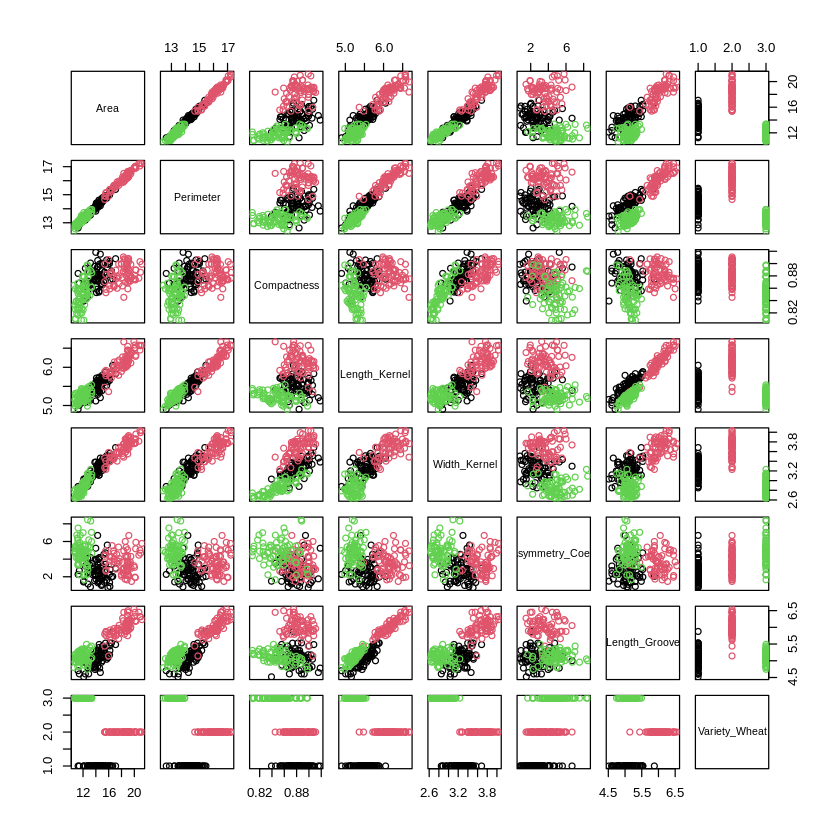

In [38]:
plot(df, col=df$Variety_Wheat)

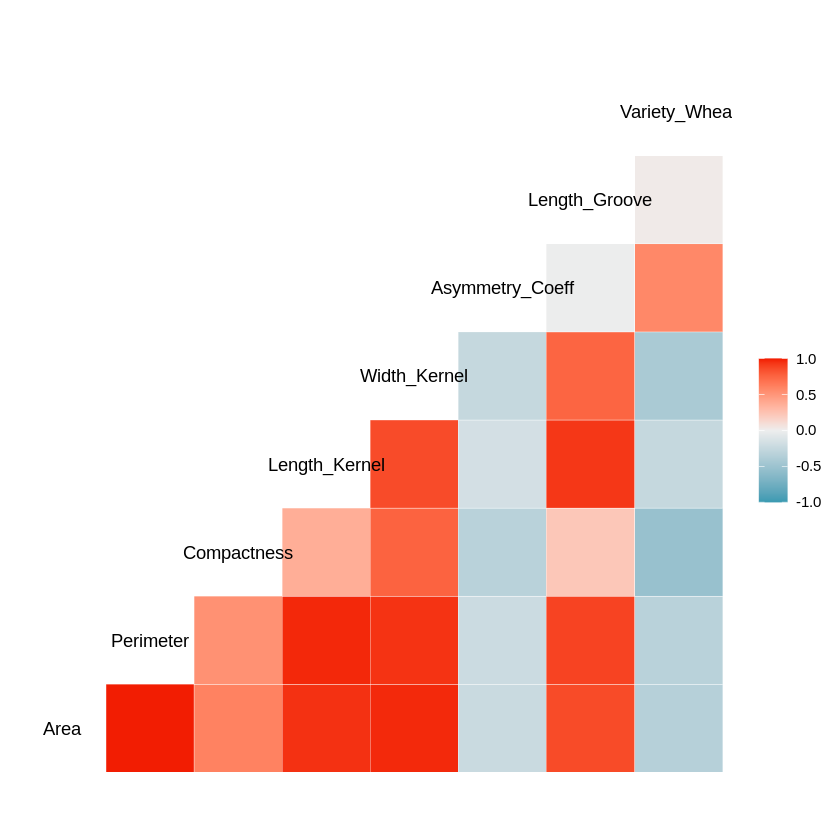

In [39]:
library('GGally')
ggcorr(df, method=c("everything", "pearson"))

In [40]:
library('dplyr')
df<- df %>% mutate(Nombre =
                     case_when(Variety_Wheat ==1 ~ "Kama", 
                               Variety_Wheat ==2~ "Rosa",
                               Variety_Wheat ==3~ "Canadian")
)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




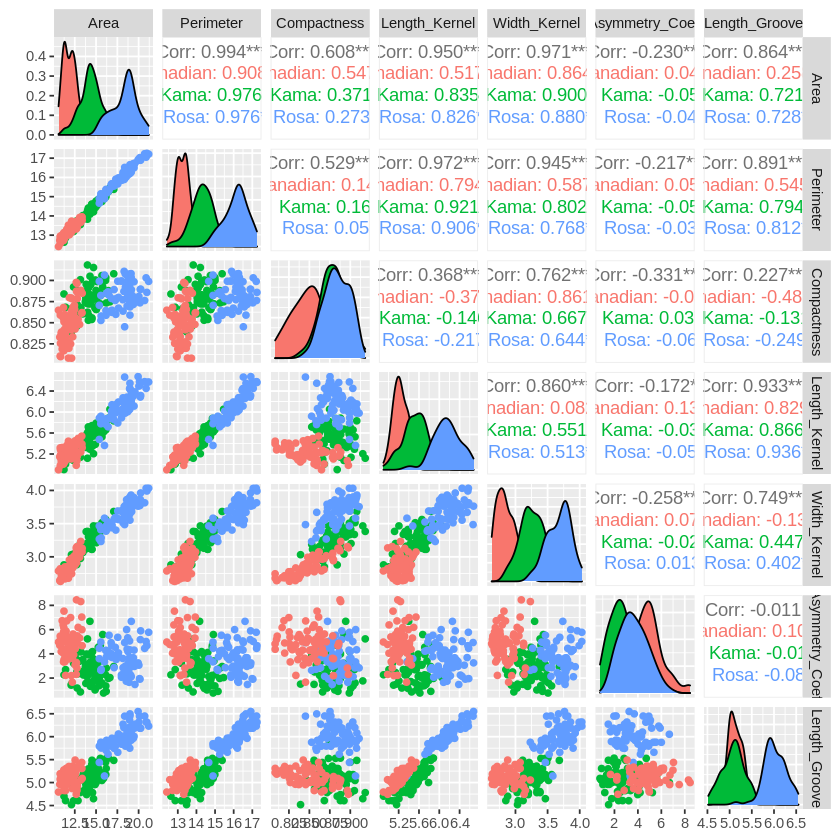

In [41]:
ggpairs(df, columns=1:7, ggplot2::aes(colour=Nombre))

Del anterior Análisis Exploratorio podemos decir 2 cosas: 

Por un lado, el dataset contiene variables que pueden ser en la practica más sencillas que medir que otras, por este motivo es de gran interes poder predecir el valor de esas variables que son más extrañas, más dificiles de medir o más costosoas de conseguir. Por lo tanto optaremos por escoger un modelo de Regresión LIneal que pueda explicar alguna de estas variables (variable Y). Estas variables son: 'Assymetry Coefficient', 'Compactness' y 'Length of Groove Kernel'.

Por otro lado, Visualizando las graficas de Dispersion y distribucion de los datos, junto con la matriz de correlacion podemos ver A SIMPLE VISTA vemos varios modelos lineales interesnates:

- Width Kernel vs Compactnnes
- Length Kernel vs Compactnnes

Sin emabrgo es de gran interes poder predecir el "Coeficiente de SImetria". Por tanto, tomando el mayor valor de la matriz de correlación tenemos ⁉

- Length of Kernel vs Assymetry Coefficient

# Regresión LIneal para predecir el coeficiente de simetría

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
    5.81560     -0.05056  

Sum of Squares:  39.82

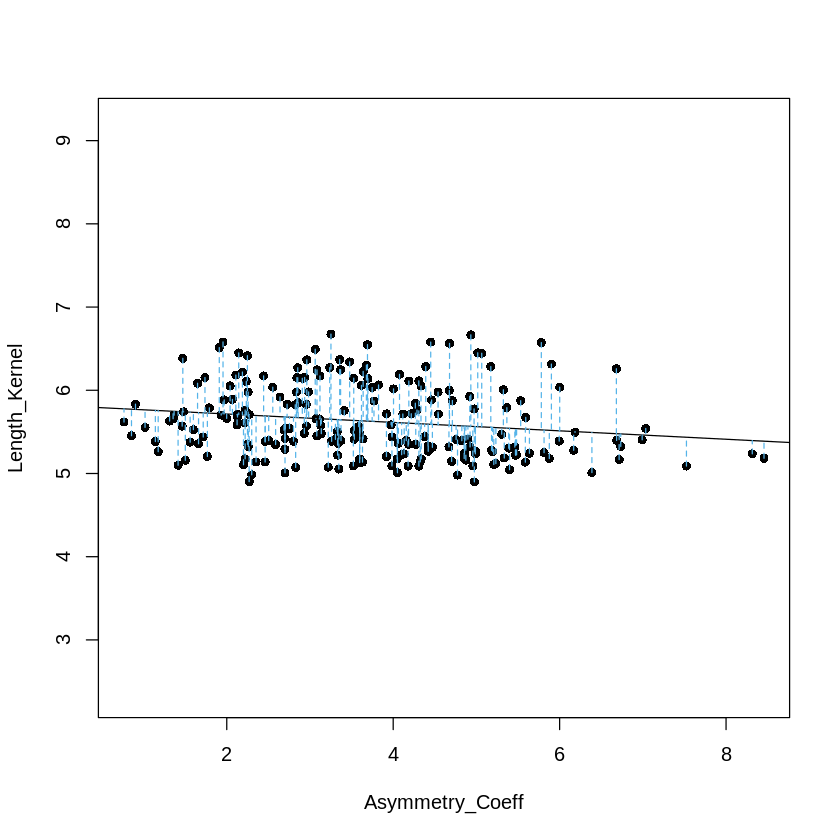

In [42]:
library(statsr)
plot_ss(x =Asymmetry_Coeff, y = Length_Kernel, data = df)

# **Modelo 1**

In [45]:
lm1<- lm(Asymmetry_Coeff~Length_Kernel, data=df)
summary(lm1)


Call:
lm(formula = Asymmetry_Coeff ~ Length_Kernel, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-2.947 -1.157 -0.019  0.977  4.496 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.9772     1.3088   5.331 2.53e-07 ***
Length_Kernel  -0.5822     0.2318  -2.512   0.0128 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.485 on 208 degrees of freedom
Multiple R-squared:  0.02943,	Adjusted R-squared:  0.02477 
F-statistic: 6.308 on 1 and 208 DF,  p-value: 0.01278


In [46]:
confint(lm1)

,2.5 %,97.5 %
(Intercept),4.396997,9.5573285
Length_Kernel,-1.039206,-0.1252041


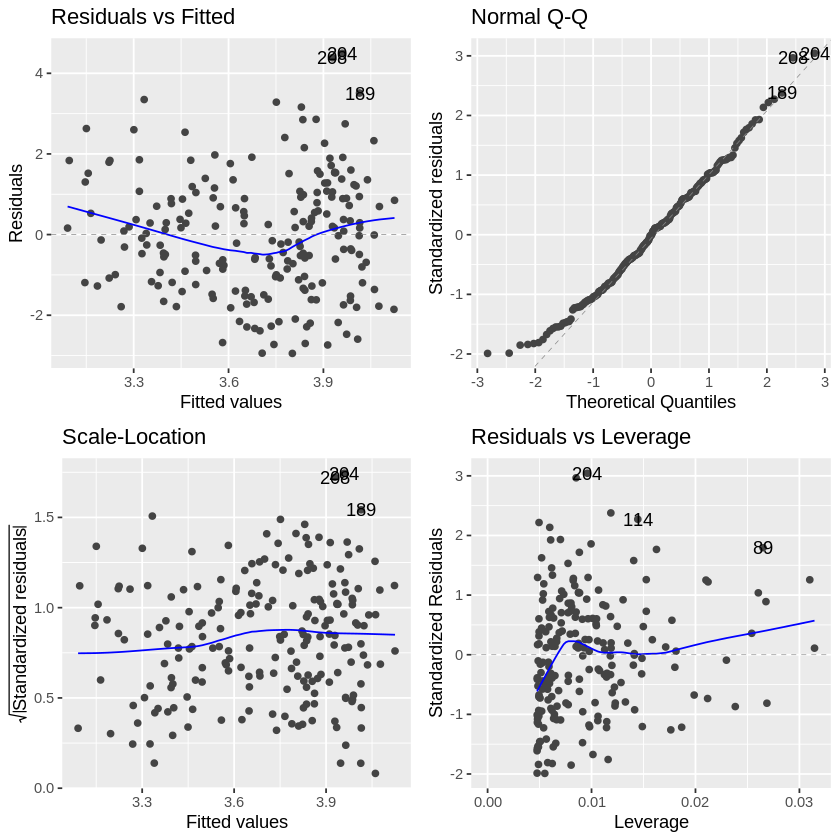

In [47]:
library(ggfortify)
autoplot(lm1)

In [49]:
library(MASS)
AIC(lm1)

[1] 765.9681

# Viendo Otros Modelos

In [50]:
lm2 <- lm(Asymmetry_Coeff~Area, data=df)

lm3 <- lm(Asymmetry_Coeff~Compactness, data=df)

lm4 <- lm(Asymmetry_Coeff~Compactness*Length_Kernel, data=df)

lm5 <- lm(Asymmetry_Coeff~Compactness*Length_Kernel*Area, data=df)


In [51]:
summary(lm2)


Call:
lm(formula = Asymmetry_Coeff ~ Area, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0453 -1.0670 -0.0326  0.9476  4.5010 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.46155    0.52757  10.352  < 2e-16 ***
Area        -0.11863    0.03487  -3.402 0.000803 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.467 on 208 degrees of freedom
Multiple R-squared:  0.0527,	Adjusted R-squared:  0.04815 
F-statistic: 11.57 on 1 and 208 DF,  p-value: 0.0008028


In [52]:
summary(lm3)


Call:
lm(formula = Asymmetry_Coeff ~ Compactness, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9463 -0.9196 -0.0655  0.8393  5.1017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   22.071      3.627   6.085 5.51e-09 ***
Compactness  -21.092      4.163  -5.067 8.90e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.422 on 208 degrees of freedom
Multiple R-squared:  0.1099,	Adjusted R-squared:  0.1056 
F-statistic: 25.67 on 1 and 208 DF,  p-value: 8.903e-07


In [53]:
summary(lm4)


Call:
lm(formula = Asymmetry_Coeff ~ Compactness * Length_Kernel, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1292 -0.9251 -0.1255  0.8454  5.1483 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)  
(Intercept)                 145.09      60.55   2.396   0.0175 *
Compactness                -160.31      69.17  -2.318   0.0214 *
Length_Kernel               -22.75      11.08  -2.054   0.0413 *
Compactness:Length_Kernel    25.74      12.64   2.036   0.0430 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.412 on 206 degrees of freedom
Multiple R-squared:  0.1302,	Adjusted R-squared:  0.1176 
F-statistic: 10.28 on 3 and 206 DF,  p-value: 2.454e-06


In [54]:
summary(lm5)


Call:
lm(formula = Asymmetry_Coeff ~ Compactness * Length_Kernel * 
    Area, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9037 -0.9179 -0.1585  0.8510  4.8715 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                    -458.273    423.963  -1.081    0.281
Compactness                     559.235    486.218   1.150    0.251
Length_Kernel                   100.619     79.143   1.271    0.205
Area                             20.826     26.133   0.797    0.426
Compactness:Length_Kernel      -120.791     90.769  -1.331    0.185
Compactness:Area                -25.530     29.848  -0.855    0.393
Length_Kernel:Area               -4.731      4.651  -1.017    0.310
Compactness:Length_Kernel:Area    5.723      5.318   1.076    0.283

Residual standard error: 1.388 on 202 degrees of freedom
Multiple R-squared:  0.1767,	Adjusted R-squared:  0.1481 
F-statistic: 6.192 on 7 and 202 DF,  p-value: 1.41e-06


In [60]:
AIC(lm1)

[1] 765.9681

In [55]:
AIC(lm2)

[1] 760.8719

In [56]:
AIC(lm3)

[1] 747.7998

In [57]:
AIC(lm4)

[1] 746.9416

In [59]:
AIC(lm5)

[1] 743.4211

Podemos ver que el AIC es coherente con el coeficiente de correlación de pearson y dicen que el mejor modelo sera el 1. Pero si vemos los resultados estadisticos de las pruebas de hipotesis es mucho mejor el modelo 3.



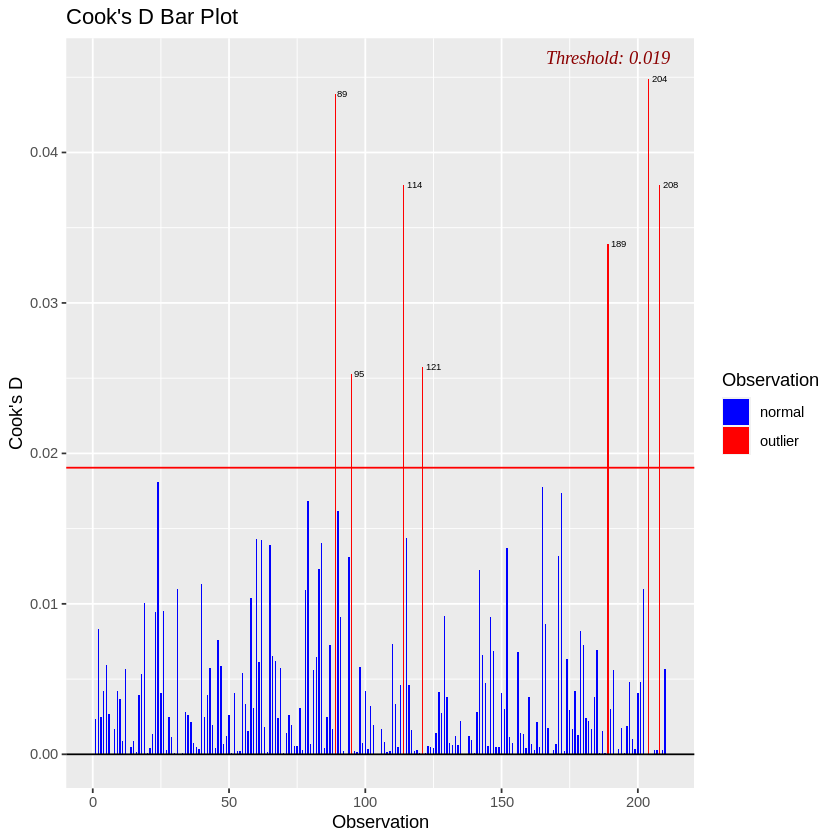

In [70]:
library(olsrr)
ols_plot_cooksd_bar(lm1)

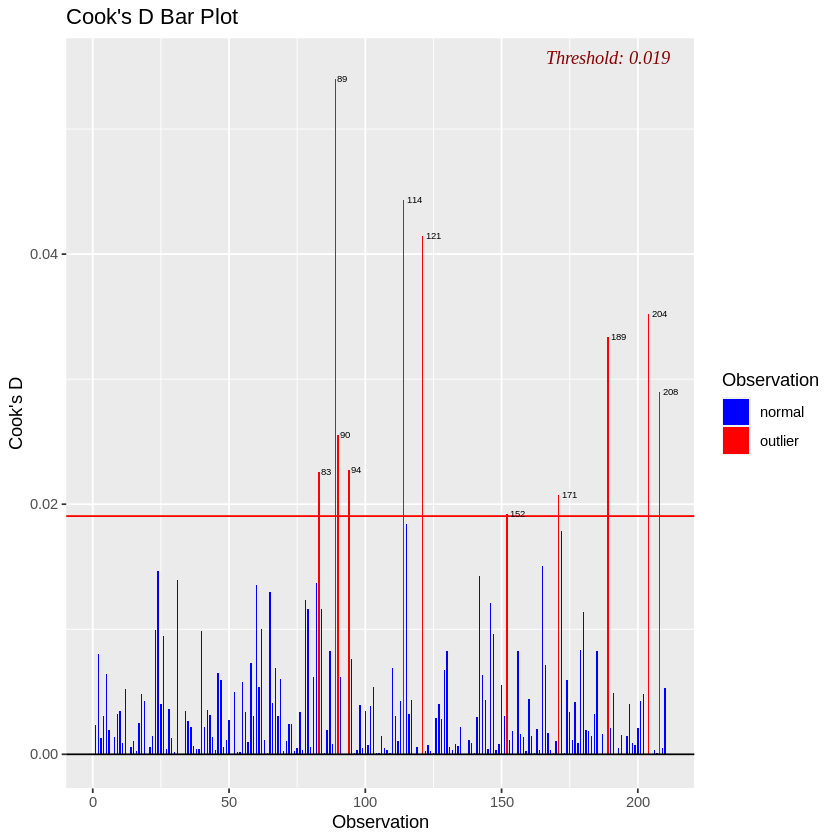

In [71]:
ols_plot_cooksd_bar(lm2)

# VIendo los resultados de una regresion Lineal más "ideal" : Width_Kernel vs Compactness 

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
    3.49846     -0.06482  

Sum of Squares:  27.832

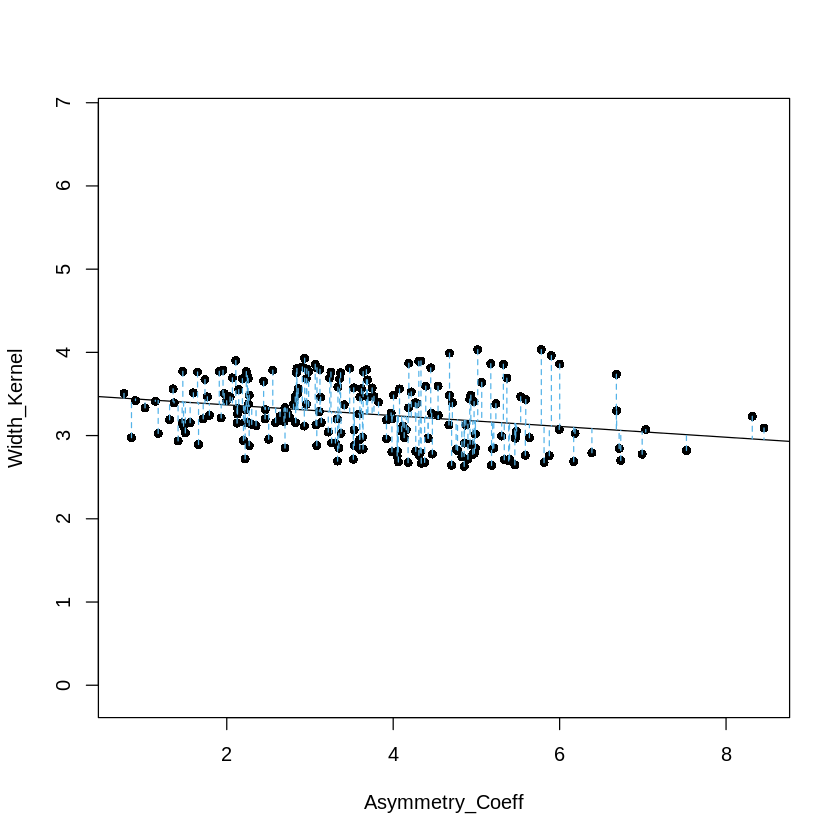

In [65]:
plot_ss(x =Asymmetry_Coeff, y = Width_Kernel, data = df)

In [66]:
lmZ<- lm(Asymmetry_Coeff~Length_Kernel, data=df)
summary(lmZ)


Call:
lm(formula = Asymmetry_Coeff ~ Length_Kernel, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-2.947 -1.157 -0.019  0.977  4.496 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.9772     1.3088   5.331 2.53e-07 ***
Length_Kernel  -0.5822     0.2318  -2.512   0.0128 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.485 on 208 degrees of freedom
Multiple R-squared:  0.02943,	Adjusted R-squared:  0.02477 
F-statistic: 6.308 on 1 and 208 DF,  p-value: 0.01278


In [67]:
confint(lmZ)

,2.5 %,97.5 %
(Intercept),4.396997,9.5573285
Length_Kernel,-1.039206,-0.1252041


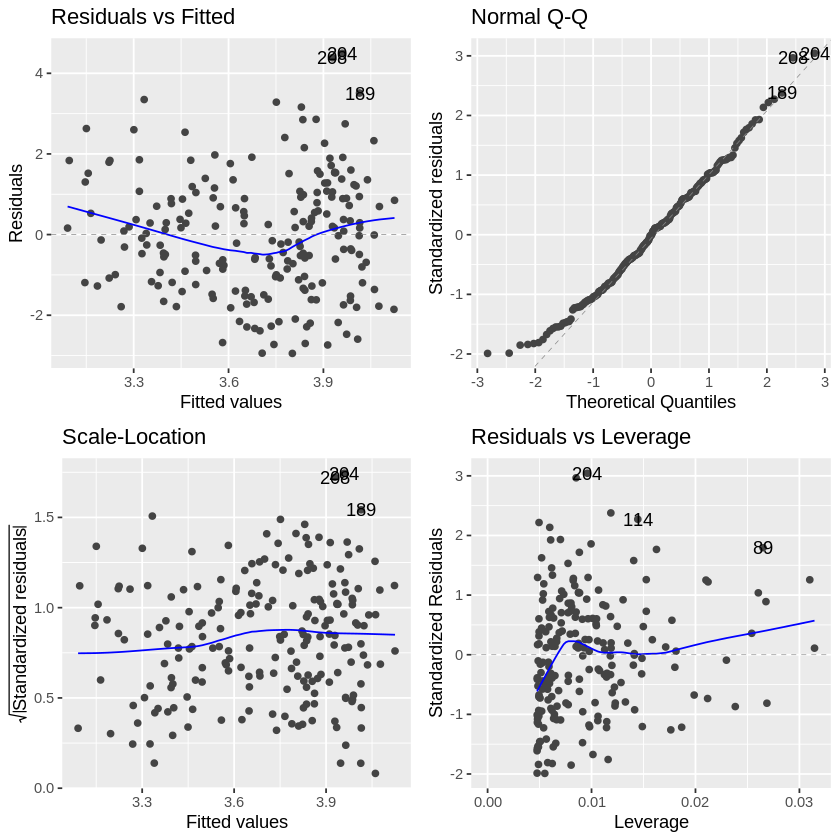

In [68]:
autoplot(lmZ)

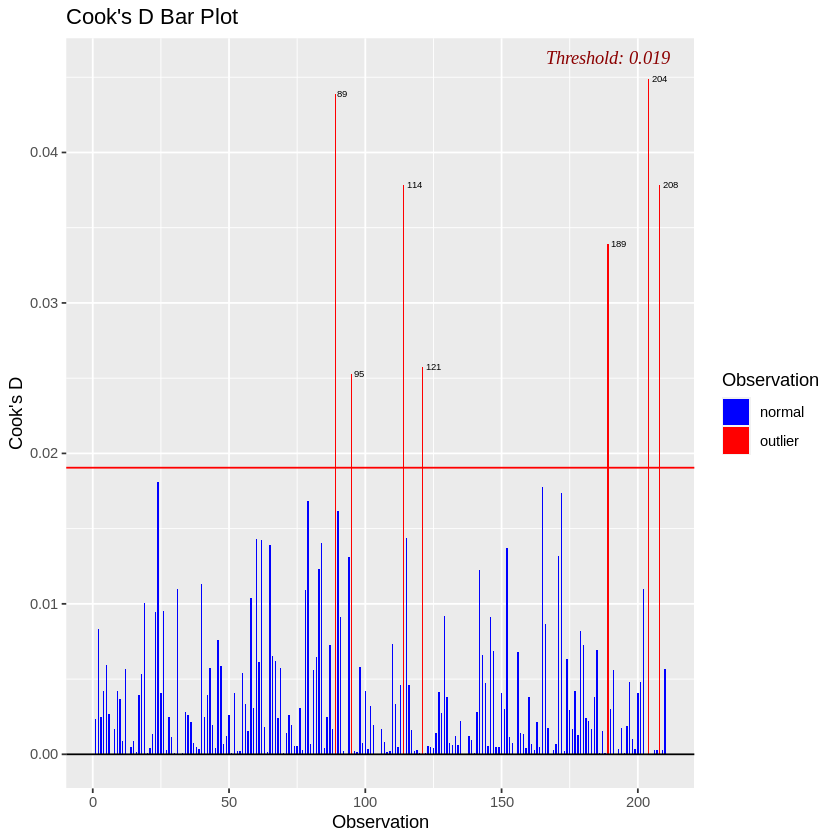

In [72]:
ols_plot_cooksd_bar(lmZ)

In [73]:
AIC(lmZ)

[1] 765.9681

#  **Conclusion**


Podemos decir que se ajusto un modelo lineal a unos datos que no tenian estructura lineal evidente,pero que era de gran valor predecir la variable Y; aquí obtuvimos 1 modelo que tenía mejor cCoeficientes de Pearson y  AIC, en contraste encontré un modelop que era mejor con las pruebas de hipotesis en general excepto en los residuales, en general se escogería el modelo con mejor AIC. 

Ademas ajustamos un modelo a unos datos con grafico de dispersión lineal y coeficiente de person muy alto, le idea era tener una idea general del comportamiento de las pruebas de hipotesis, graficas, AIC, entre ambos casos descritos, pero no se encontro ningun patron evidente.

William Andrés Gómez Roa